Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.4710 - loss: 1.0522 - val_accuracy: 0.6000 - val_loss: 0.9586
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5928 - loss: 0.9687 - val_accuracy: 0.7111 - val_loss: 0.8716
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5934 - loss: 0.9118 - val_accuracy: 0.7111 - val_loss: 0.7941
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6424 - loss: 0.8323 - val_accuracy: 0.7111 - val_loss: 0.7263
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6393 - loss: 0.7718 - val_accuracy: 0.7111 - val_loss: 0.6677
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6705 - loss: 0.6999 - val_accuracy: 0.7111 - val_loss: 0.6174
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6570 - loss: 0.6587 - val_accuracy: 0.7111 - val_loss: 0.5740
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6330 - loss: 0.6285 - val_accuracy: 0.7111 - val_loss: 0.5371
Epo

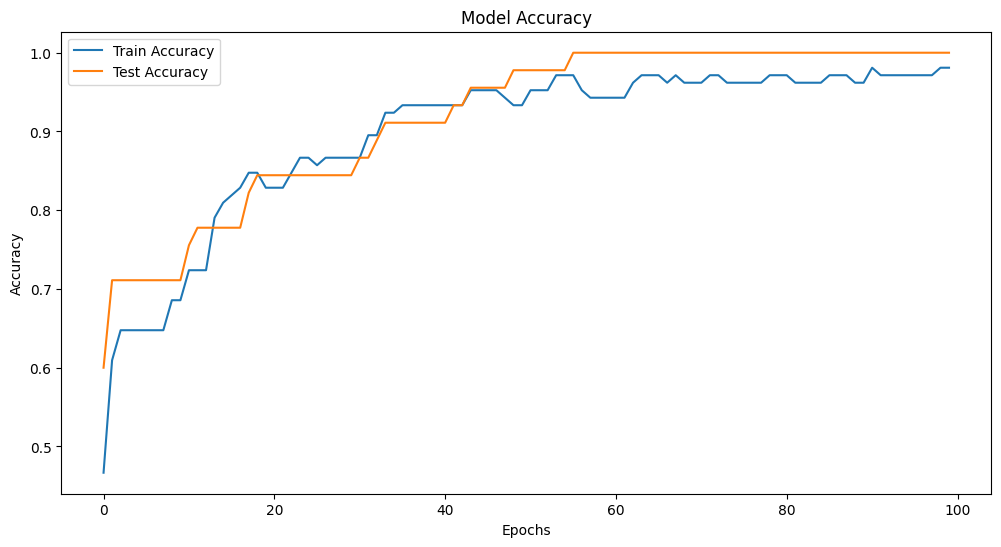

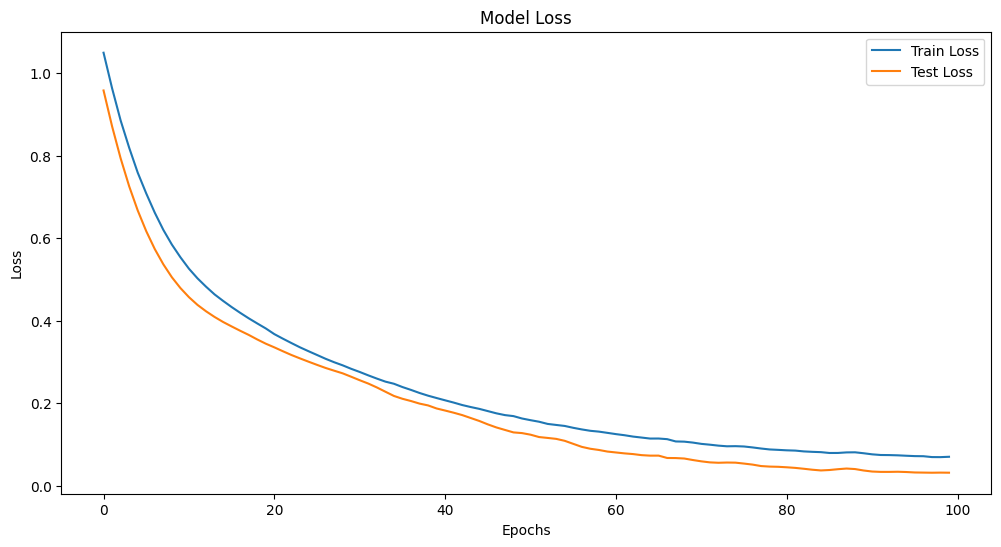

Downloaded setosa.jpg successfully.
versicolor.jpg already exists.
Downloaded virginica.jpg successfully.
Contents of 'images' directory:
['virginica.jpg', 'versicolor.jpg', 'setosa.jpg']
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Sample 1:
Predicted Class: Versicolor
Actual Class: Versicolor


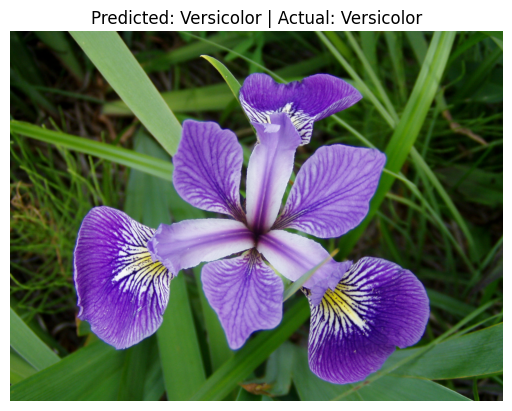


Sample 2:
Predicted Class: Setosa
Actual Class: Setosa


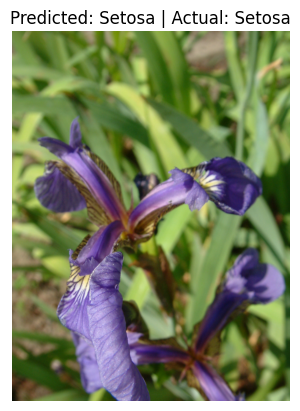


Sample 3:
Predicted Class: Virginica
Actual Class: Virginica


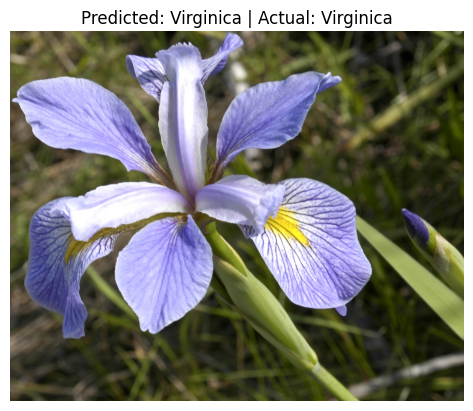


Sample 4:
Predicted Class: Versicolor
Actual Class: Versicolor


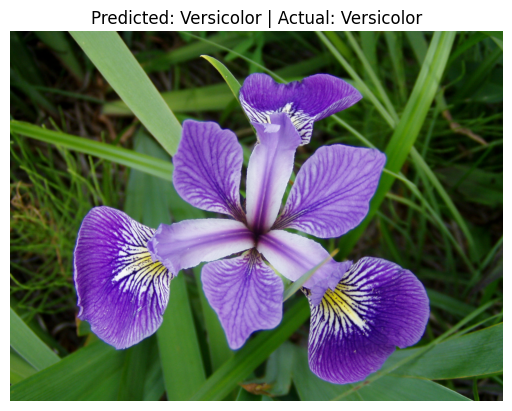


Sample 5:
Predicted Class: Versicolor
Actual Class: Versicolor


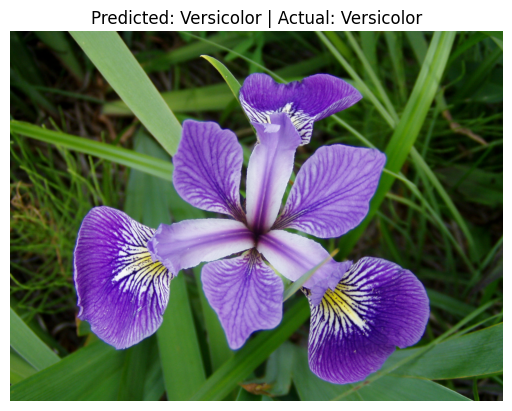

In [ ]:
# Iris Flower Classification with TensorFlow and Image Display

# Step 1: Import the required libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import requests

# Step 2: Load and Preprocess the Iris Dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Labels

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define the TensorFlow Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize the training process
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Download Images of Iris Species

# Create a directory to store images
os.makedirs('images', exist_ok=True)

# Define custom headers to comply with Wikimedia's User-Agent policy
headers = {
    'User-Agent': 'IrisClassifier/1.0 (mailto:your-email@example.com)'
}

# Updated URLs of images
image_urls = {
    'setosa': 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg',
    'versicolor': 'https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
    'virginica': 'https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
}

# Download images if they don't already exist
for species, url in image_urls.items():
    img_path = f'images/{species}.jpg'
    if not os.path.exists(img_path):
        try:
            print(f"Downloading {species} image...")
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()  # Check for HTTP errors
            with open(img_path, 'wb') as f:
                f.write(response.content)
            print(f"Downloaded {species}.jpg successfully.")
        except requests.exceptions.RequestException as e:
            print(f"Failed to download image for {species}: {e}")
    else:
        print(f"{species}.jpg already exists.")

# Verify images
print("Contents of 'images' directory:")
print(os.listdir('images'))

# Step 10: Make Predictions and Display Images

# Map class indices to species names
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Display predictions with corresponding images
for i in range(5):  # Display first 5 test samples
    pred_class = predicted_classes[i]
    actual_class = actual_classes[i]
    predicted_species = class_names[pred_class]
    actual_species = class_names[actual_class]

    print(f"\nSample {i+1}:")
    print(f"Predicted Class: {predicted_species}")
    print(f"Actual Class: {actual_species}")

    # Build the image path (lowercase species name)
    img_path = f'images/{predicted_species.lower()}.jpg'

    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_species} | Actual: {actual_species}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found for {predicted_species} at {img_path}")
